# Curso de introducción al análisis y modelado de datos con Python 

<img src="../images/cacheme.png" alt="logo" style="width: 150px;"/>
<img src="../images/aeropython_logo.png" alt="logo" style="width: 115px;"/>

---

# Scikit-Learn: Reducción de la dimensionalidad y Clustering.

En esta clase veremos cómo utilizar el paquete `scikit-learn` de Python para resolver problemas de aprendizaje automático no supervisados, utilizando algoritmos de Reducción de la dimensionalidad y Clustering.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

## Clustering

 En primer lugar vamos a fabricar dos nubes de puntos usando la función `make_blobs`:

In [2]:
# https://github.com/amueller/scipy-2016-sklearn/blob/master/notebooks/05%20Supervised%20Learning%20-%20Classification.ipynb
from sklearn.datasets import make_blobs

In [3]:
# creamos los blobs
features, labels = make_blobs(centers=[[6, 0], [2, -1]], random_state=0)
features.shape

(100, 2)

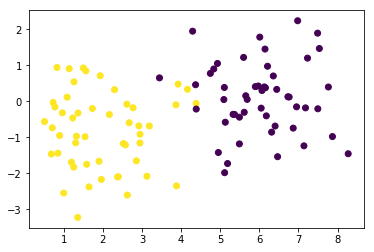

In [4]:
# representamos las nubes de puntos
plt.scatter(features[:, 0], features[:, 1], c=labels)

Hemos creado dos grupos y algunos puntos se solapan, pero ¿qué pasaría si no tuviésemos esta información visual? Vamos a emplear un modelo de clustering para agrupar los datos:

In [5]:
# Importamos KMeans
from sklearn.cluster import KMeans

Ejemplo del funcionamiento de K-Means: https://youtu.be/_aWzGGNrcic?t=266

In [6]:
# Creamos el modelo
model = KMeans()
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Observa que por defecto tenemos 8 clusters. Veamos qué ocurre:

In [7]:
# Lo entrenamos
model.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Ahora **no** pasamos la información de las etiquetas al algoritmo a la hora de entrenar. En la práctica por supuesto no la tendremos.

In [8]:
# Obtenemos los centroides
centroids = model.cluster_centers_
centroids

array([[ 2.77614446, -0.89619889],
       [ 5.98559521, -0.03722089],
       [ 1.52400734, -1.82236616],
       [ 4.42631252,  0.51489379],
       [ 1.22637705,  0.15951107],
       [ 6.64871271,  1.53096864],
       [ 7.33264571, -0.67568458],
       [ 4.92457211, -1.73109765]])

In [9]:
# Predecimos a qué grupo pertencen los puntos que tenemos
labels_pred = model.predict(features)

Y ahora preparamos el código para representar todas las regiones:

In [10]:
# Creamos la malla
xmin, xmax = features[:, 0].min(), features[:, 0].max()
ymin, ymax = features[:, 1].min(), features[:, 1].max()

xx, yy = np.meshgrid(
    np.linspace(xmin, xmax),
    np.linspace(ymin, ymax)
)

In [11]:
# Preparamos la malla para pasar por el modelo
mesh = np.hstack((xx.reshape(-1, 1), yy.reshape(-1, 1)))
mesh

array([[ 0.50874241, -3.22340315],
       [ 0.66713041, -3.22340315],
       [ 0.82551842, -3.22340315],
       ...,
       [ 7.95297862,  2.2408932 ],
       [ 8.11136662,  2.2408932 ],
       [ 8.26975462,  2.2408932 ]])

In [12]:
# Predecimos para los valores de la malla
Z = model.predict(mesh)

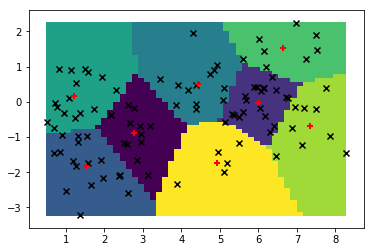

In [13]:
# Pintamos
# http://pybonacci.org/2015/01/14/introduccion-a-machine-learning-con-python-parte-1/
plt.pcolormesh(xx, yy, Z.reshape(xx.shape))

plt.scatter(features[:, 0], features[:, 1], marker='x', color='k')#c=labels_pred)

plt.scatter(centroids[:, 0], centroids[:, 1], marker='+', color='r', lw=2)

Si lo metemos todo en una función interactiva:

In [14]:
from ipywidgets import interact

In [15]:
def cluster(n=3):
    model = KMeans(n_clusters=n)
    model.fit(features)
    labels_pred = model.predict(features)
    centroids = model.cluster_centers_

    Z = model.predict(mesh)

    plt.pcolormesh(xx, yy, Z.reshape(xx.shape))
    plt.scatter(features[:, 0], features[:, 1], marker='x', color='k')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='+', color='r', lw=2)

    plt.show()

In [16]:
interact(cluster, n=(2, 6))

interactive(children=(IntSlider(value=3, description='n', max=6, min=2), Output()), _dom_classes=('widget-interact',))

<function __main__.cluster>

## Reducción de dimensionalidad

Vamos a rescatar nuestro dataset de los dígitos y tratar de visualizarlo en dos dimensiones, lo que se conoce como _reducción de dimensionalidad_.

In [17]:
# Cargamos el dataset de los dígitos
from sklearn.datasets import load_digits
digits = load_digits()

In [18]:
# Importamos Isomap y Multidimensional scaling de manifold
from sklearn.manifold import Isomap, MDS

In [19]:
# Creamos un Isomap de dos componentes
model = Isomap(n_components=2)

In [20]:
# Entrenamos
model.fit(digits.data)

Isomap(eigen_solver='auto', max_iter=None, n_components=2, n_jobs=1,
    n_neighbors=5, neighbors_algorithm='auto', path_method='auto', tol=0)

Y ahora proyectamos los datos usando `.transform`:

In [21]:
# Transformamos
digits_proj = model.transform(digits.data)

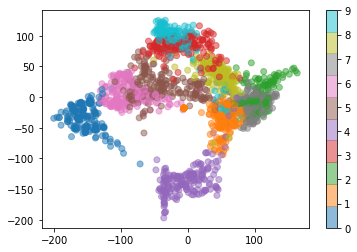

In [22]:
# representamos
plt.scatter(digits_proj[:, 0], digits_proj[:, 1],
            c=digits.target, cmap=plt.cm.Vega10, alpha=0.5)
plt.colorbar()

In [23]:
# Igual con MDS
model = MDS(n_components=2 ,n_jobs=-1)

digits_proj = model.fit_transform(digits.data)

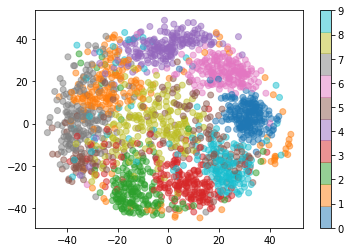

In [24]:
plt.scatter(digits_proj[:, 0], digits_proj[:, 1],
                 c=digits.target, cmap=plt.cm.Vega10,
                 alpha=0.5)
plt.colorbar()

## Ejercicio

1. Visualiza el dataset de las flores (`load_iris`) utilizando las funciones que tienes más abajo. ¿Hay alguna forma clara de separar las tres especies de flores?
2. Separa el dataset en matriz de características `features` y vector de etiquetas `labels`. Conviértelos a arrays de NumPy usando `.as_matrix()`.
3. Reduce la dimensionalidad del dataset a 2 usando `sklearn.manifold.Isomap` o `sklearn.decomposition.PCA` y usa un algoritmo de clustering con 3 clusters. ¿Se parecen los clusters que aparecen a los grupos originales?
4. Predice el tipo de flor usando un algoritmo de clasificación. Visualiza la matriz de confusión. ¿Cuál es el porcentaje de aciertos del algoritmo? ¿Es más certero en algún tipo de flor en concreto? ¿Concuerda esto con lo que pensaste en el apartado 1?

In [25]:
# preserve
import pandas as pd

def load_iris_df():
    from sklearn.datasets import load_iris

    iris = load_iris()
    features, labels = iris.data, iris.target

    df = pd.DataFrame(features, columns=iris.feature_names)
    df["species"] = pd.Categorical.from_codes(iris.target, categories=iris.target_names)

    #df = df.replace({'species': {0: iris.target_names[0], 1: iris.target_names[1], 2: iris.target_names[2]}})

    return df

iris_df = load_iris_df()

In [26]:
# preserve
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


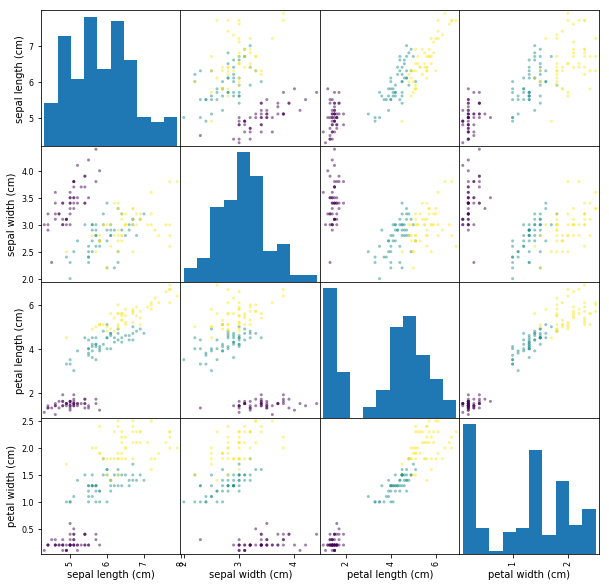

In [27]:
# preserve
_ = pd.plotting.scatter_matrix(iris_df, c=iris_df["species"].cat.codes, figsize=(10, 10))

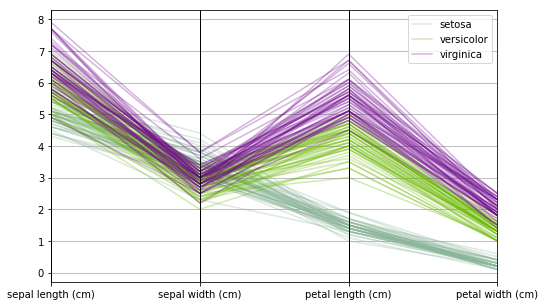

In [28]:
# parallel coordinates
plt.figure(figsize=(8, 5))
_ = pd.plotting.parallel_coordinates(iris_df, 'species', alpha=0.3)

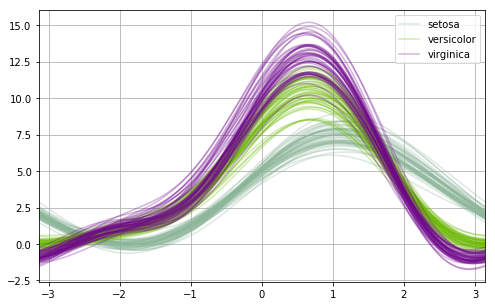

In [29]:
# andrews
plt.figure(figsize=(8, 5))
_ = pd.plotting.andrews_curves(iris_df, 'species', alpha=0.3)

In [30]:
# preserve
from sklearn.model_selection import train_test_split

In [31]:
# preserve
features = iris_df.iloc[:, :4].as_matrix()
target = iris_df.iloc[:, -1].as_matrix()

In [32]:
# division en validacion y test
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.4)

## Normalización de los datos 

In [33]:
# de las funciones de preprocesado se importa StandardScaler
from sklearn.preprocessing import StandardScaler

In [34]:
# Se normalizan los datos creando un scaler
scaler = StandardScaler()
scaler.fit(X_train)

# X_train_norm
X_train_norm = scaler.transform(X_train)
# X_test_norm
X_test_norm = scaler.transform(X_test)

In [35]:
# preserve
scaler.mean_, scaler.scale_

(array([5.85555556, 3.04      , 3.70555556, 1.18111111]),
 array([0.81296592, 0.46447103, 1.71200734, 0.74742438]))

In [36]:
# preserve
iris_df.mean()

sepal length (cm)    5.843333
sepal width (cm)     3.054000
petal length (cm)    3.758667
petal width (cm)     1.198667
dtype: float64

## Clasificación con KNN

In [37]:
# Importamos el clasificador KNN de neighbours
from sklearn.neighbors import KNeighborsClassifier

In [38]:
# Creación del clasificador
clf = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)

# Entrenamiento
clf.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
           weights='uniform')

In [39]:
# Acierto
clf.score(X_test, Y_test)

0.9666666666666667

## Selección de número de vecinos

### ¿Qué ocurre si variamos el número de vecinos? ¿y si solo tomamos uno?

Probemos a pasar los datos de entrenamiento para verlo más claro

In [40]:
# Creación del clasificador
clf = KNeighborsClassifier(n_neighbors=1)

# Entrenamiento
clf.fit(X_train, Y_train)
clf.score(X_train, Y_train)

1.0

In [41]:
clf.score(X_test, Y_test)

0.9666666666666667

La clasificación con un solo vecino asigna el mismo grupo al que pertenece el vecino más cercano

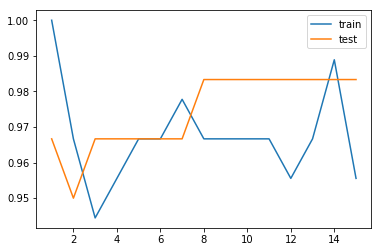

In [42]:
# preserve
n_neighbours = np.arange(1, 16)
test_score = np.zeros_like(n_neighbours, dtype=float)
train_score = np.zeros_like(n_neighbours, dtype=float)

for ii, n in enumerate(n_neighbours):
    clf = KNeighborsClassifier(n_neighbors=n)
    # Entrenamiento
    clf.fit(X_train, Y_train)
    # Acierto     
    train_score[ii] = clf.score(X_train, Y_train)
    test_score[ii] = clf.score(X_test, Y_test)

plt.plot(n_neighbours, train_score, label='train')
plt.plot(n_neighbours, test_score, label='test')
plt.legend()

### ¿Cómo debemos fijar los hiperparámetros? 

In [43]:
# De las herramientas de seleccion de modelos importamos GridSearch
from sklearn.model_selection import GridSearchCV

In [44]:
# preserve
n_neighbours = np.arange(1, 16)
params = {'n_neighbors': n_neighbours}

In [45]:
# creamos el clf con GridSearch
clf = GridSearchCV(KNeighborsClassifier(), params)
# lo entrenamos
clf.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Una vez que se ha hecho el grid search, el objecto contiene información acerca del índice de acierto para cada valor de hiperparámetro en el atributo `.grid_scores_`:

In [46]:
# Vemos los resultados en cv_results_
clf.cv_results_

/home/asaez/miniconda3/envs/cacheme-datos/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/asaez/miniconda3/envs/cacheme-datos/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/asaez/miniconda3/envs/cacheme-datos/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*wa

{'mean_fit_time': array([0.00097561, 0.00060209, 0.00036915, 0.00031257, 0.00032457,
        0.00027951, 0.00026457, 0.00033108, 0.0002567 , 0.00025241,
        0.00032703, 0.00025471, 0.00025876, 0.00037336, 0.00025447]),
 'mean_score_time': array([0.00177503, 0.00099063, 0.00067647, 0.00058659, 0.000549  ,
        0.00053144, 0.00051181, 0.00053215, 0.00048566, 0.0004859 ,
        0.00065414, 0.00049424, 0.00049885, 0.00065168, 0.00050163]),
 'mean_test_score': array([0.93333333, 0.91111111, 0.92222222, 0.92222222, 0.93333333,
        0.93333333, 0.94444444, 0.94444444, 0.94444444, 0.95555556,
        0.94444444, 0.95555556, 0.93333333, 0.9       , 0.93333333]),
 'mean_train_score': array([1.        , 0.97249545, 0.95582569, 0.97240437, 0.9611991 ,
        0.96147541, 0.95591985, 0.96138434, 0.96147541, 0.96138434,
        0.96684882, 0.95591985, 0.95591985, 0.93915594, 0.93360038]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
        

In [47]:
# preserve
grid_scores = pd.DataFrame(clf.cv_results_)
grid_scores.head()

/home/asaez/miniconda3/envs/cacheme-datos/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/asaez/miniconda3/envs/cacheme-datos/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/asaez/miniconda3/envs/cacheme-datos/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*wa

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_neighbors,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.000976,0.001775,0.933333,1.000000,1,{'n_neighbors': 1},7,0.870968,1.000000,0.966667,1.000000,0.965517,1.000000,0.000064,0.000172,0.045209,0.000000
1,0.000602,0.000991,0.911111,0.972495,2,{'n_neighbors': 2},14,0.870968,1.000000,0.933333,0.966667,0.931034,0.950820,0.000021,0.000085,0.029113,0.020496
2,0.000369,0.000676,0.922222,0.955826,3,{'n_neighbors': 3},12,0.903226,0.983051,0.933333,0.950000,0.931034,0.934426,0.000033,0.000071,0.013801,0.020274
3,0.000313,0.000587,0.922222,0.972404,4,{'n_neighbors': 4},12,0.903226,1.000000,0.933333,0.950000,0.931034,0.967213,0.000017,0.000028,0.013801,0.020740
4,0.000325,0.000549,0.933333,0.961199,5,{'n_neighbors': 5},7,0.903226,0.983051,0.966667,0.933333,0.931034,0.967213,0.000026,0.000019,0.026159,0.020738


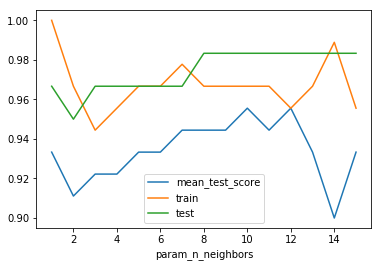

In [48]:
# pintamos la puntuación media
grid_scores.plot(x='param_n_neighbors', y='mean_test_score')

# La comparamos con la anterior
plt.plot(n_neighbours, train_score, label='train')
plt.plot(n_neighbours, test_score, label='test')
plt.legend()

In [49]:
# Buscamos el mejor valor de parámetro
clf.best_params_

{'n_neighbors': 10}

### ¿Cómo elegir los datos de validación y test? 

In [50]:
# preserve
from sklearn.model_selection import cross_val_score, cross_val_predict

In [51]:
# Creamos un clasificador
clf = KNeighborsClassifier(n_neighbors=5)

In [52]:
# Vemos la puntuación de la validación cruzada
cross_val_score(clf, features, target, cv=15, n_jobs=-1)

array([1.        , 0.91666667, 1.        , 1.        , 1.        ,
       0.77777778, 1.        , 0.88888889, 1.        , 0.88888889,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [53]:
# Vemos la predicción con validación cruzada
cross_val_predict(clf, features, target, cv=15, n_jobs=-1)

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'virginica',
      

###### Juan Luis Cano, Alejandro Sáez, Mabel Delgado

---
_Las siguientes celdas contienen configuración del Notebook_

_Para visualizar y utlizar los enlaces a Twitter el notebook debe ejecutarse como [seguro](http://ipython.org/ipython-doc/dev/notebook/security.html)_

    File > Trusted Notebook

In [54]:
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = '../style/style.css'
HTML(open(css_file, "r").read())